In [ ]:
import pandas, numpy, math, pickle, urllib, json

def get_driving_distance_osm(str_lat_comma_long1,str_lat_comma_long2):
    query_args = { 'fromPlace':str_lat_comma_long1, 'toPlace':str_lat_comma_long2,'mode':'CAR' }
    encoded_args = urllib.urlencode(query_args)
    #print 'Encoded:', encoded_args
    url = 'http://13.218.151.99:8080/otp/routers/default/plan?' + encoded_args
    temp = json.load(urllib.urlopen(url))
    return temp['plan']['itineraries'][0]['legs'][0]['distance']

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    km = 6367 * c
    return km

#Distances in Simulated data
import numpy, pickle
from profit_maximization import euclidean
flag_sim_dist_stat = False
if flag_sim_dist_stat:
    data = pickle.load(open('../../../Xharecost_MS_annex/plot_data.pkl','rb'))
    instance = data['instance_base']
    all_requests = instance['all_requests']
    distances = numpy.zeros(len(all_requests))
    for i in all_requests:
        distances[i] = euclidean(all_requests[i]['orig'],all_requests[i]['dest'])
    distDF = pandas.DataFrame(data=distances,index=range(len(all_requests)),columns=['dist'])
    #print distDF.describe()
    print distDF.median()
# dist    49.527744
# dtype: float64

In [ ]:
flag_debug = False
if flag_debug:
    
    df0 = pandas.read_csv('../../../Xharecost_MS_annex/hour9.csv',usecols= ['pickup_datetime','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'])

    df = df0[(abs(df0.pickup_latitude-0) > 1e-5) & \
             (abs(df0.pickup_longitude-0) > 1e-5) & \
             (abs(df0.dropoff_latitude-0) > 1e-5) & \
             (abs(df0.dropoff_longitude-0) > 1e-5)]
    #print df.describe()

    df['pickup_datetime'] = pandas.to_datetime(df['pickup_datetime'])
    for i in range(60):
        df1 = df[(df['pickup_datetime'].dt.minute >= i) & (df['pickup_datetime'].dt.minute < i+1)]
        #print 'minute: {0} count: {1}'.format(i,len(df1))
    float(df1.iloc[[200]]['dropoff_latitude'])


    str_lat_comma_long1 = '40.616276,-74.017921'
    str_lat_comma_long2 = '40.865898,-73.697060'
    #print get_driving_distance_osm(str_lat_comma_long1,str_lat_comma_long2)
    print haversine(-74.017921,40.616276,-73.697060,40.865898)

In [1]:
%matplotlib notebook
from profit_maximization import *
random.seed(5000)
import pickle,pandas
flag_nyc_data=True
nyc_df = load_nyc_data()
coeff_internal = 10
GAMMA_ARRAY = [0,0.1,0.2,0.3,0.4]
NO_OF_REQUESTS_IN_UNIVERSE = 40
instance_params = get_instance_params(NO_OF_REQUESTS_IN_UNIVERSE,GAMMA_ARRAY,flag_nyc_data)
instance_base = generate_base_instance(instance_params,flag_nyc_data,0,nyc_df)
coin_flip_params_wo_gamma = get_coin_flip_params_wo_gamma()
instance_partial = flip_coins_wo_gamma(instance_base,coin_flip_params_wo_gamma)
coin_flip_params = get_coin_flip_params_w_gamma(coin_flip_params_wo_gamma,coeff_internal)
instance = flip_coins_w_gamma(instance_partial,coin_flip_params)
#get_stats(0,instance)
experiment_params = {'DISCOUNT_SETTING':'detour_based','GAMMA':0}
solution,total_profit = solve_instance(0,instance,experiment_params)
# for k in solution:
#     print(k,solution[k])

C:\Users\q4fj4lj9\AppData\Local\Continuum\Miniconda\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
profit_maximization.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  nyc_df['pickup_datetime'] = pandas.to_datetime(nyc_df['pickup_datetime'])


NYC instance for minute: 0 count of requests: 213
Coeff 10: Coin flip 0: Experiment Gamma = 0. Total profit: 4759.5638875. Size of matching graph: 42. #Total ridesharers: 64


In [2]:
def profit_stats_given_requests(r1,r2,instance,experiment_params):
    request_arr = [r1,r2]
    for r in request_arr:
        print 'Indiv.     non RS profit from {0}:\t{1}'.format(r,get_profit_non_ride_sharing([r],instance))
        print 'Indiv. RS unmatched profit from {0}:\t{1}'.format(r,get_profit_unmatched([r],instance))
    print 'Rideshare incremental profit from {0} and {1}: {2}'.format(r1,r2,get_incremental_profit([r1,r2],instance,experiment_params))

#print(2*len(solution['matched_request_pairs_with_permutations']))
#for k in solution['matched_request_pairs_with_permutations']:
#    profit_stats_given_requests(k[0],k[1],instance,experiment_params)

In [3]:
#from plotter import plot_OD_ridesharing
#plot_OD_ridesharing(solution,instance)
import copy
solution0 = copy.deepcopy(solution)

<IPython.core.display.Javascript object>


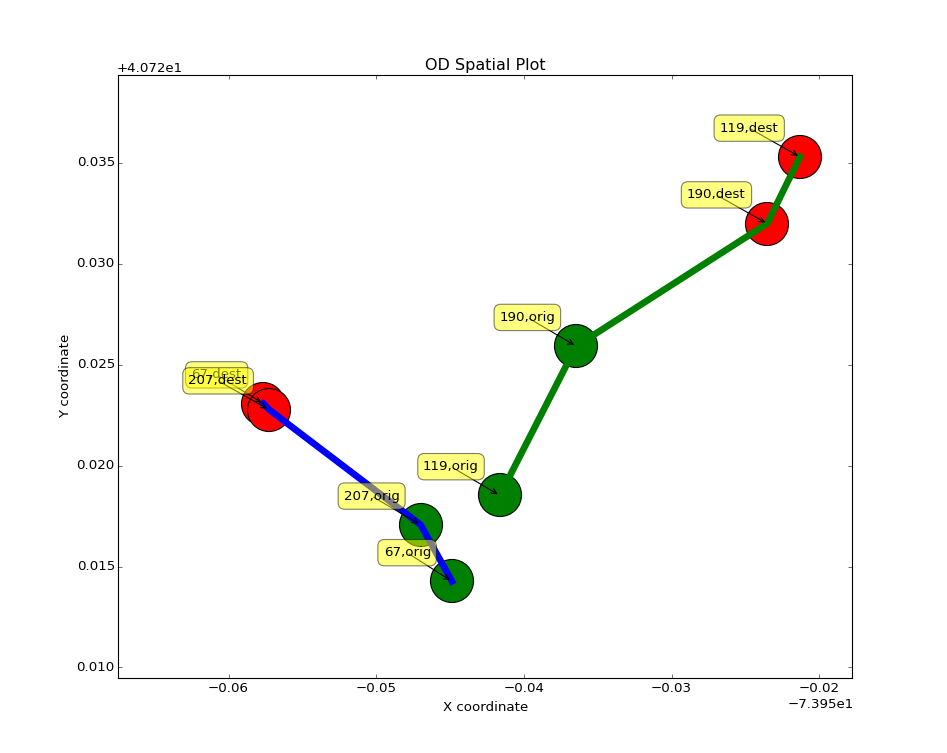

case2: 67,207:('si', 'sj', 'dj', 'di')
case2: 119,190:('si', 'sj', 'dj', 'di')


In [4]:
import matplotlib
import matplotlib.pyplot as plt

solution['matched_request_pairs_with_permutations'] = {}
counter = 0
for x,v in solution0['matched_request_pairs_with_permutations'].items():
    solution['matched_request_pairs_with_permutations'][x] = v
    counter += 1
    if counter==2:
        break
    

plot_rs_matched = True
if plot_rs_matched == True:
    temp_request_set = set()
    for k in solution['matched_request_pairs_with_permutations']:
        temp_request_set.add(k[0])
        temp_request_set.add(k[1])
    data0 = {x:instance['all_requests'][x] for x in temp_request_set}
else:        
    data0 = {x:instance['all_requests'][x] for x in instance['all_requests'] if instance['all_requests'][x]['RIDE_SHARING'][experiment_params['GAMMA']]==True}

data = data0
N = len(data)
labels = ['{0}'.format(i) for i in data]

fig = plt.figure()
ax = fig.add_subplot(111)

pd = {'orig':'green','dest':'red'}
for loc in pd:
    x = [data[z][loc][0] for z in data]
    y = [data[z][loc][1] for z in data]

#     plt.scatter(x, y, s=80, c=pd[loc], marker="o")

    ax.scatter(x, y, marker = 'o', 
        c = pd[loc], s = 1500,
        cmap = plt.get_cmap('Spectral'))
    for label, x, y in zip(labels, x, y):
        ax.annotate(
            label+','+loc, 
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

data_matched = solution['matched_request_pairs_with_permutations']
for p,q in data_matched:
    if instance['instance_params']['all_permutations_two'][data_matched[(p,q)]]=='case1':
        print "case1: {0},{1}:{2}".format(p,q,data_matched[(p,q)])
        if data_matched[(p,q)][0] == 'sj':
            (p,q) = (q,p)
        ax.plot([data[p]['orig'][0],data[q]['orig'][0],data[p]['dest'][0],data[q]['dest'][0]],\
                [data[p]['orig'][1],data[q]['orig'][1],data[p]['dest'][1],data[q]['dest'][1]],linewidth=6)
    elif instance['instance_params']['all_permutations_two'][data_matched[(p,q)]]=='case2':
        print "case2: {0},{1}:{2}".format(p,q,data_matched[(p,q)])
        if data_matched[(p,q)][0] == 'sj':
            (p,q) = (q,p)
        ax.plot([data[p]['orig'][0],data[q]['orig'][0],data[q]['dest'][0],data[p]['dest'][0]],\
                [data[p]['orig'][1],data[q]['orig'][1],data[q]['dest'][1],data[p]['dest'][1]],linewidth=6)

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('OD Spatial Plot')
plt.show()

In [ ]:
solution['matched_request_pairs_with_permutations']

In [ ]:
q